# importing libraries

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from datasets import Dataset, load_metric
import random
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# loading data

In [4]:
df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test= pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# data understanding

In [5]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# trying to analyse relationship with keyword 

In [7]:
mask=df['keyword'].value_counts().reset_index().sort_values(by='count', ascending=False)
sum=0
for i in mask['count']:
    sum=sum+i
sum

7552

In [8]:
df[df['keyword'].isna()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [10]:
df['keyword'].isna().sum()  # there is 61 rows where no keyword has missing value

61

In [11]:
df['location'].nunique()

3341

In [12]:
pd.set_option('display.max_colwidth', None)
df['text'].head(3)

0                                                                    Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                   Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Name: text, dtype: object

# data cleaning

In [13]:
def clean_text(text):
    text=re.sub(r'https\s+|http\s+|www\s+','',text, flags= re.MULTILINE)
    text=re.sub(r'\@\w+|\#', '',text)
    text=re.sub(r'\d+','',text)
    text=text.translate(str.maketrans('','',string.punctuation))
    text=re.sub(r'\s+',' ',text).strip()
    text=text.lower()
    return text

In [14]:
df['text']=df['text'].apply(clean_text)
test['text']=test['text'].apply(clean_text)
test

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities stay safe everyone
2,3,NaN,NaN,there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety fasteners xrwn
3259,10865,NaN,NaN,storm in ri worse than last hurricane my cityampothers hardest hit my yard looks like it was bombed around k still without power
3260,10868,NaN,NaN,green line derailment in chicago httptcoutbxlcbiuy
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo httptcoxrbqjhn


# storing copy of the data

In [15]:
train=df.copy()
tst=test.copy()

In [16]:
id= tst['id']

# droping col for now

In [17]:


train.drop(columns=['location','keyword','id'],inplace=True)
tst.drop(columns=['location','keyword','id'],inplace=True)
#tst.drop(columns=['location','keyword','id'],inplace=True)


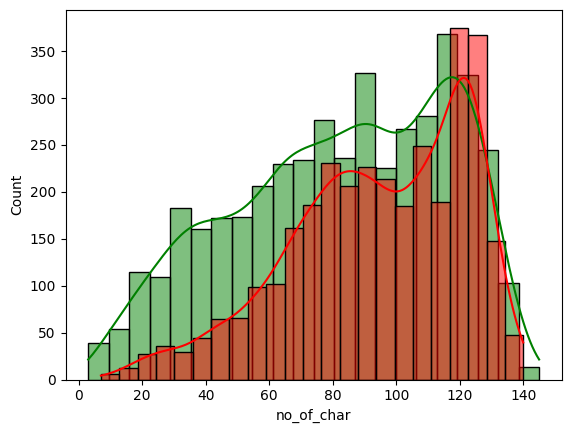

In [18]:
train['no_of_char']=train['text'].apply(len)
sns.histplot(train[train['target']==0]['no_of_char'],kde=True,color='green')
sns.histplot(train[train['target']==1]['no_of_char'],kde=True,color='red')
plt.show()

**we can see there is some relation between no of character in a tweet and target**
  1. in genral disaster tweets has more character
  2. very few tweets about disaster has less than 50 words

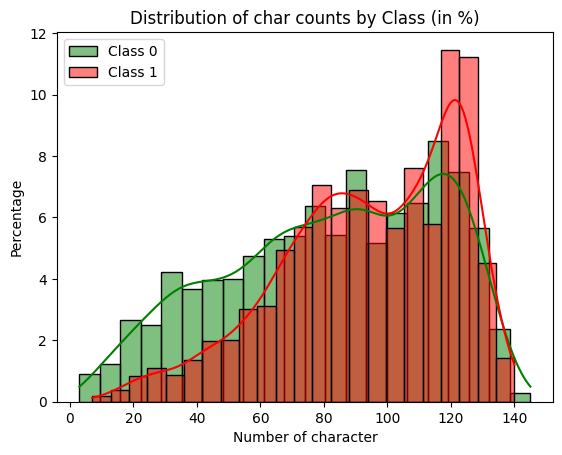

In [19]:
sns.histplot(train[train['target'] == 0]['no_of_char'], kde=True, color='green', stat='percent', label='Class 0')
sns.histplot(train[train['target'] == 1]['no_of_char'], kde=True, color='red', stat='percent', label='Class 1')

plt.xlabel('Number of character')
plt.ylabel('Percentage')
plt.title('Distribution of char counts by Class (in %)')
plt.legend()
plt.show()


In [20]:
train['nums_words']=train['text'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))
tst['nums_words']=tst['text'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))

<Axes: xlabel='nums_words', ylabel='Count'>

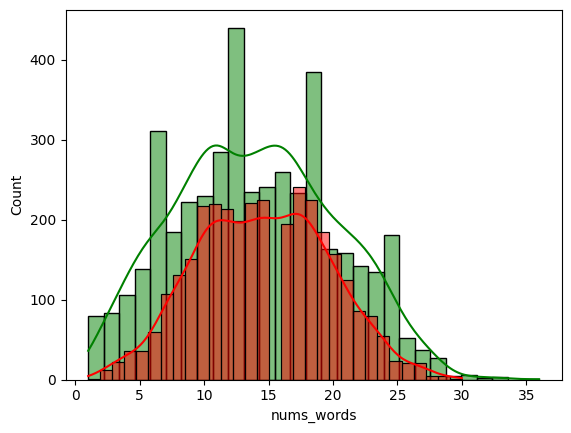

In [21]:
sns.histplot(train[train['target']==0]['nums_words'],kde=True,color='green')
sns.histplot(train[train['target']==1]['nums_words'],kde=True,color='red')

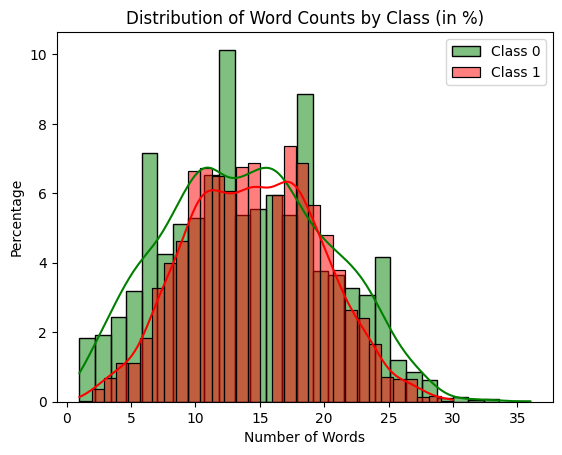

In [22]:
sns.histplot(train[train['target'] == 0]['nums_words'], kde=True, color='green', stat='percent', label='Class 0')
sns.histplot(train[train['target'] == 1]['nums_words'], kde=True, color='red', stat='percent', label='Class 1')

plt.xlabel('Number of Words')
plt.ylabel('Percentage')
plt.title('Distribution of Word Counts by Class (in %)')
plt.legend()
plt.show()


**not finding any significant relation between no of word and target**

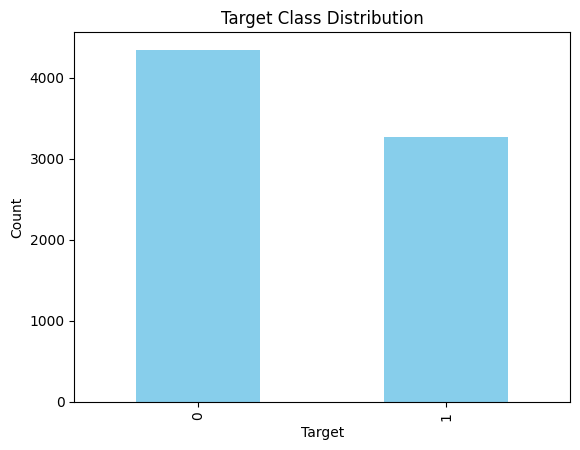

In [23]:
df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Target Class Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [24]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

**we can see target class almost balanced so we do not nessessarly need to apply any balancing method**

In [25]:
# Features and labels
#X = train['text']
#y = train['target']

# Oversampling
#ros = RandomOverSampler(random_state=42)
#X, y = ros.fit_resample(X.values.reshape(-1, 1), y)

# Convert resampled data back to DataFrame
#train_df = pd.DataFrame({'text': X.flatten(), 'target': y})

#will see if it can improve our model or not later

# generating word clouds

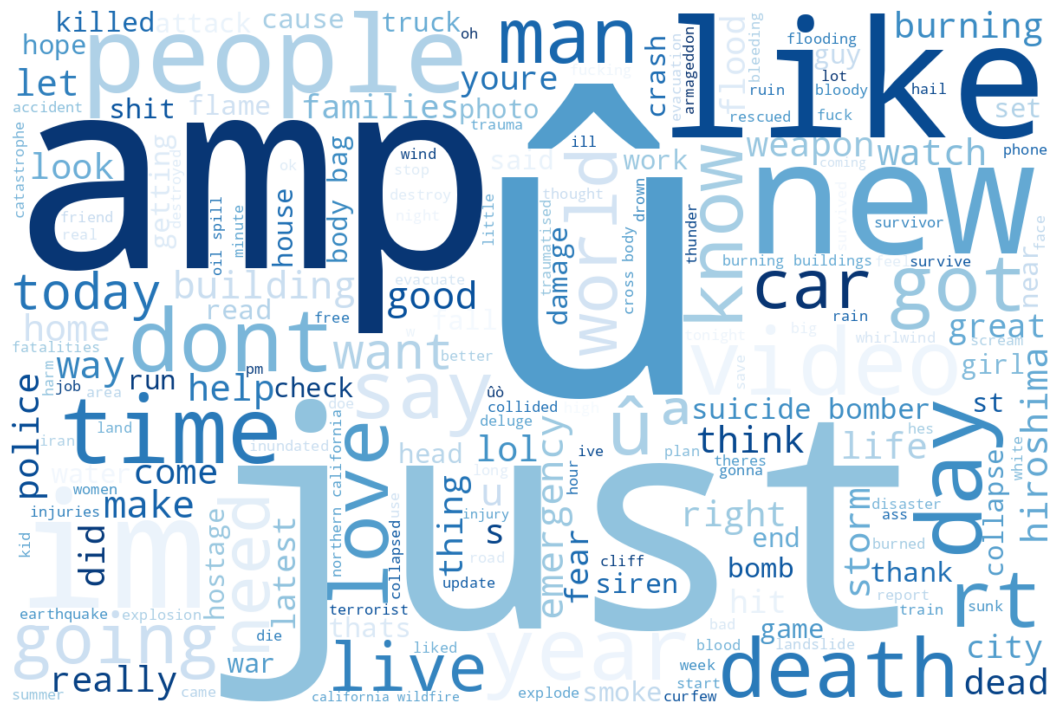

In [26]:
# word cloud for all texts

text_data = " ".join(train['text'])

wordcloud = WordCloud(
    stopwords=ENGLISH_STOP_WORDS,
    background_color='white',
    max_words=200,
    width=1200,
    height=800,
    colormap='Blues' 
).generate(text_data)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

    

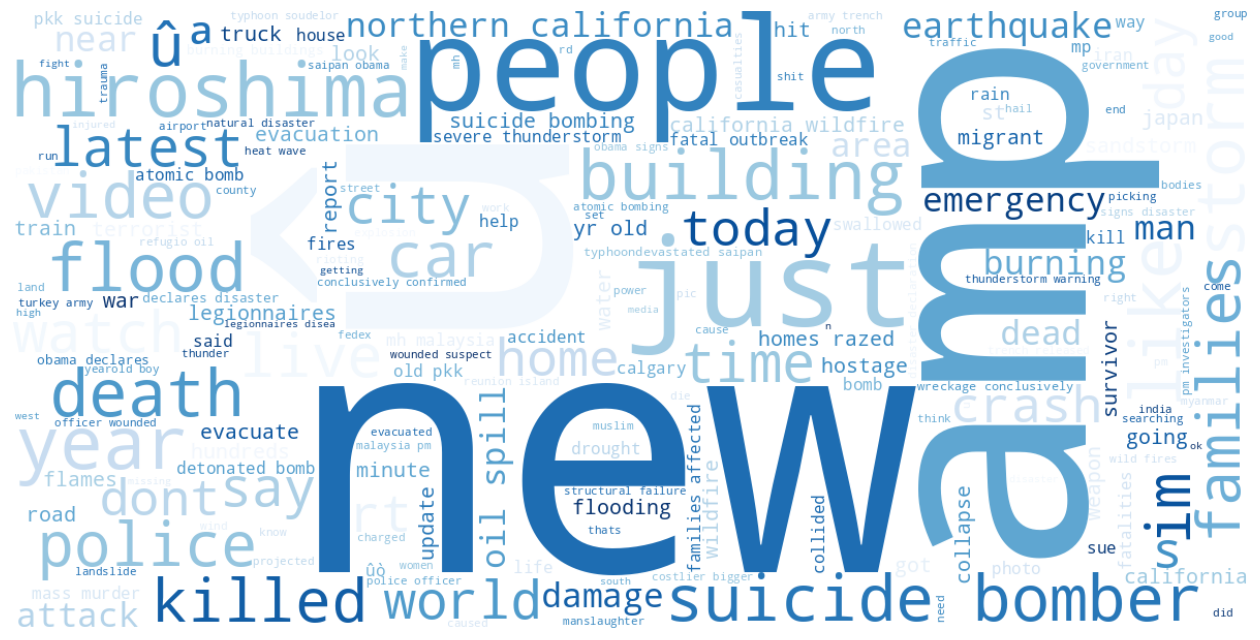

In [27]:
#generating word cloud for only disaster tweets
disaster_texts = train[train['target'] == 1]['text']

text_data = " ".join(disaster_texts )

wordcloud = WordCloud(
    stopwords=ENGLISH_STOP_WORDS,
    background_color='white',
    max_words=200,
    width=1200,
    height=600,
    colormap='Blues' 
).generate(text_data)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

    

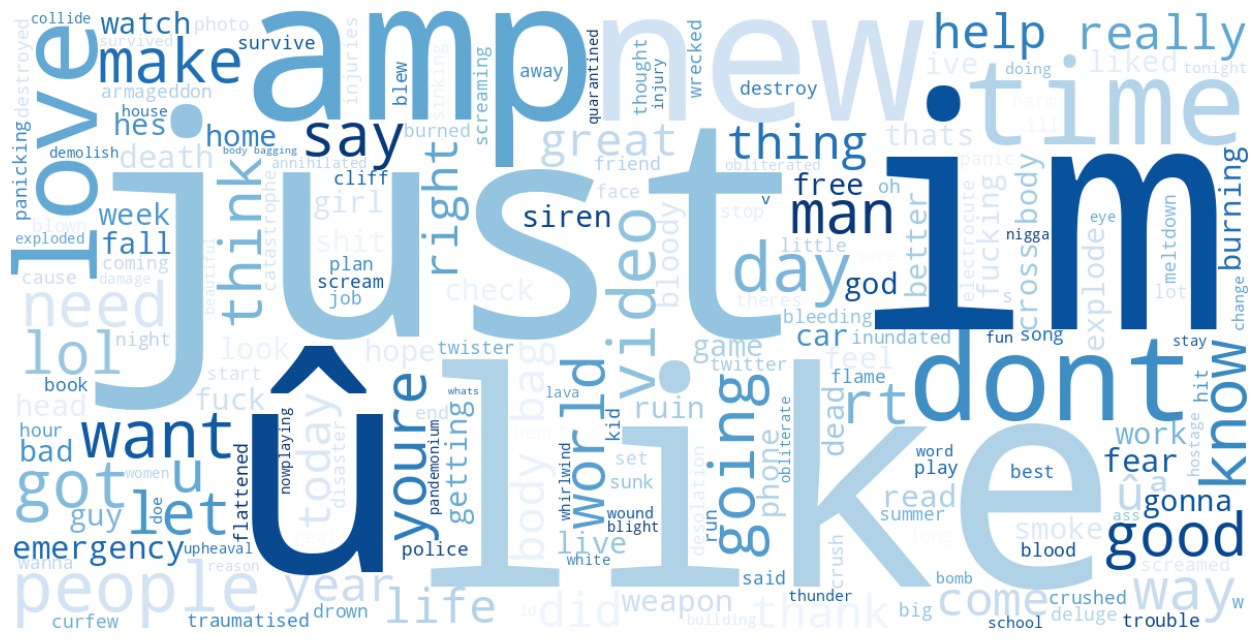

In [28]:
#generating word cloud for only non disaster tweets
disaster_texts =train[train['target']==0]['text']

text_data = " ".join(disaster_texts )

wordcloud = WordCloud(
    stopwords=ENGLISH_STOP_WORDS,
    background_color='white',
    max_words=200,
    width=1200,
    height=600,
    colormap='Blues' 
).generate(text_data)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
train.head(3)

,text,target,no_of_char,nums_words
0,our deeds are the reason of this earthquake may allah forgive us all,1,68,13
1,forest fire near la ronge sask canada,1,37,7
2,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,1,130,22


In [30]:
train.drop(columns=['nums_words','no_of_char'],inplace=True)

In [31]:
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))
tst['text'] = tst['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))
train.head(3)

,text,target
0,deeds reason earthquake allah forgive,1
1,forest near la ronge sask canada,1
2,residents asked shelter place notified officers evacuation shelter place orders expected,1


In [32]:
tst.head(3)

,text,nums_words
0,just happened terrible car crash,6
1,heard earthquake different cities stay safe,9
2,forest spot pond geese fleeing street save,19


# Text Vectorization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(train['text']).toarray()


In [34]:

y = df['target'].values

# train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# model building

In [36]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

classification report:                  precision    recall  f1-score   support

           0       0.77      0.67      0.72       870
           1       0.62      0.74      0.68       653

    accuracy                           0.70      1523
   macro avg       0.70      0.70      0.70      1523
weighted avg       0.71      0.70      0.70      1523



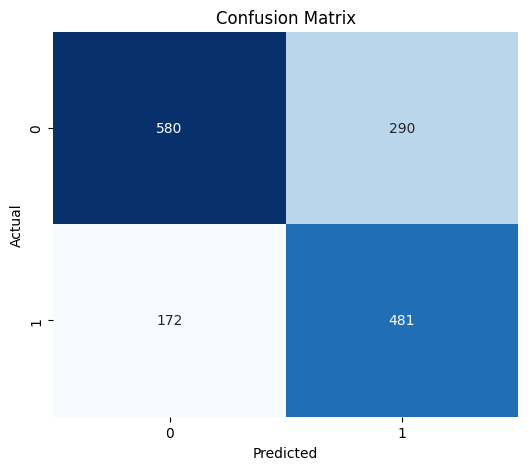

In [37]:

y_pred1 = gnb.predict(X_test)
print('classification report:   ', classification_report(y_test,y_pred1))
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



classification report:               precision    recall  f1-score   support

           0       0.77      0.67      0.72       870
           1       0.62      0.74      0.68       653

    accuracy                           0.70      1523
   macro avg       0.70      0.70      0.70      1523
weighted avg       0.71      0.70      0.70      1523



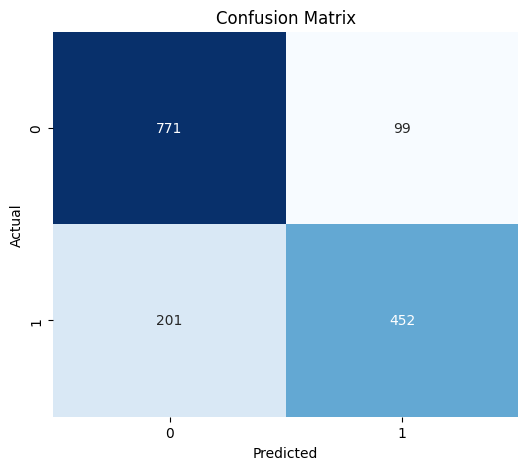

In [38]:

y_pred2 = mnb.predict(X_test)
print('classification report:', classification_report(y_test,y_pred1))
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


classification report:               precision    recall  f1-score   support

           0       0.80      0.90      0.84       870
           1       0.83      0.69      0.76       653

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.81      1523



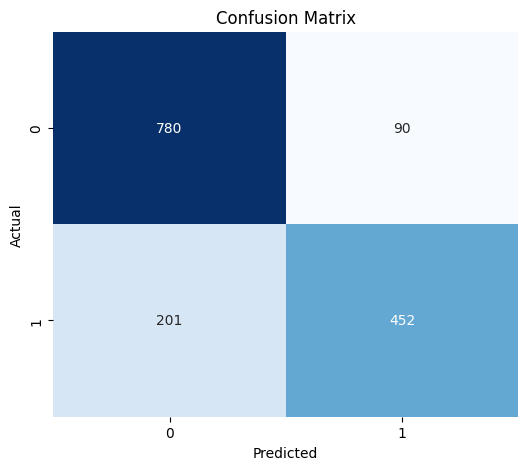

In [39]:

y_pred3= bnb.predict(X_test)

print('classification report:', classification_report(y_test,y_pred3))
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


classification report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       870
           1       0.76      0.74      0.75       653

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



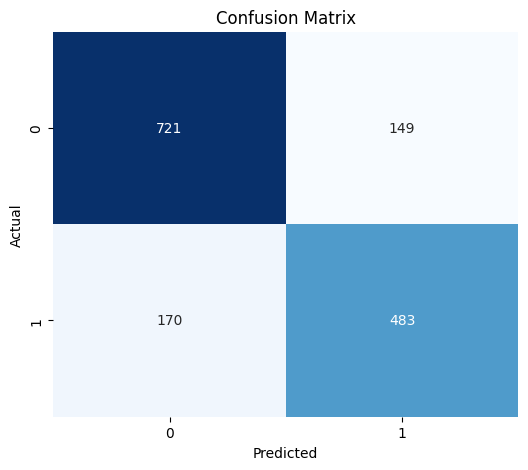

In [40]:
y_probs = bnb.predict_proba(X_test)[:, 1]  # probabilities for class 1
threshold = 0.3
y_pred4 = (y_probs >= threshold).astype(int)


print('classification report:', classification_report(y_test,y_pred4))
cm=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


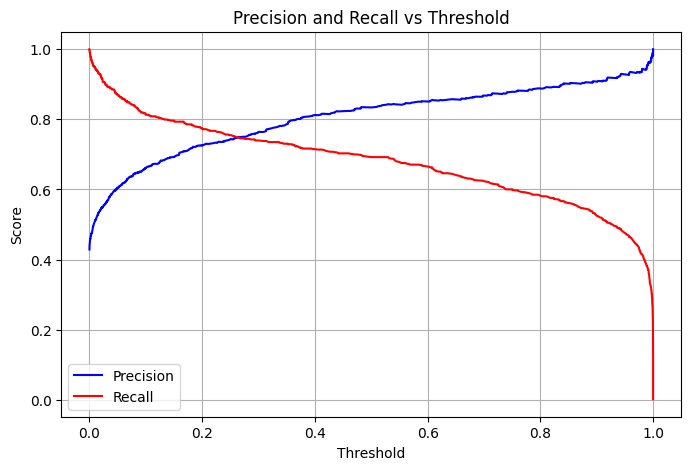

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_probs = bnb.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


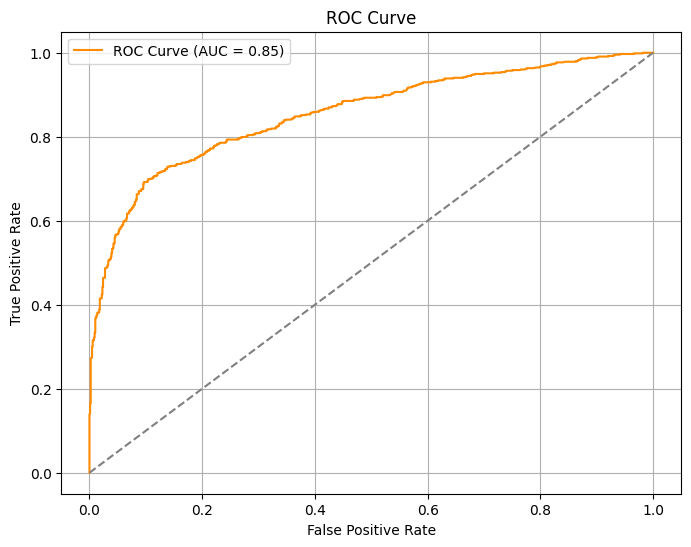

In [42]:

fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


# Bert

In [46]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = TFAutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
train

In [47]:
x=train.text
y=train.target

In [ ]:
x

In [48]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [50]:
max_len = max([len(text) for text in x_train])
max_len

138

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_test 

In [51]:
train_encodings = tokenizer(
    list(x_train),
    truncation=True,
    padding=True,
    max_length=138,
    return_tensors=None
   
)

test_encodings = tokenizer(
    list(x_test),
    truncation=True,
    padding=True,
    max_length=138,
    return_tensors=None
)

In [ ]:
#train_encodings

In [53]:
import tensorflow as tf

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(32)

In [55]:
train_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 43), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 43), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# bert fine tuning

In [56]:
from transformers import create_optimizer

# Set training parameters
batch_size = 32
epochs = 3
num_train_steps = (len(x_train) // batch_size) * epochs

# Create optimizer
optimizer, lr_schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)

In [57]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [58]:
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [59]:
history=model.fit(train_dataset.shuffle(1000), epochs=5,validation_data=test_dataset,batch_size=32)

Epoch 1/5
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


I0000 00:00:1755275004.815338     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 [==============================] - 76s 184ms/step - loss: 0.4674 - accuracy: 0.7908 - val_loss: 0.3733 - val_accuracy: 0.8444
Epoch 2/5
191/191 [==============================] - 31s 160ms/step - loss: 0.3387 - accuracy: 0.8655 - val_loss: 0.3896 - val_accuracy: 0.8378
Epoch 3/5
191/191 [==============================] - 32s 165ms/step - loss: 0.2426 - accuracy: 0.9072 - val_loss: 0.4277 - val_accuracy: 0.8359
Epoch 4/5
191/191 [==============================] - 31s 161ms/step - loss: 0.1993 - accuracy: 0.9255 - val_loss: 0.4277 - val_accuracy: 0.8359
Epoch 5/5
191/191 [==============================] - 31s 162ms/step - loss: 0.2017 - accuracy: 0.9264 - val_loss: 0.4277 - val_accuracy: 0.8359


48/48 [==============================] - 2s 48ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       849
           1       0.82      0.80      0.81       674

    accuracy                           0.84      1523
   macro avg       0.83      0.83      0.83      1523
weighted avg       0.84      0.84      0.84      1523



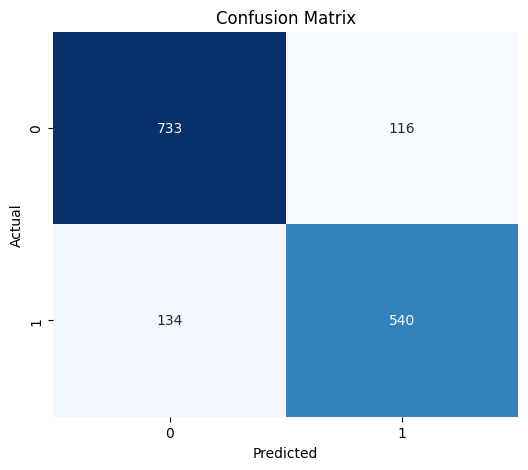

In [68]:
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
     